# Testing Chemistry for molecule environment

TODO:

    - clean data set of invalid smile objects
    - find out when you can add bonds 
        - must be related to the valency
        - 

In [3]:
# imports crucial to molecule object
import pandas as pd
import os
from rdkit import Chem, DataStructs
import random
from Chemistry import Mol

# imports for testing

In [4]:
df = pd.read_csv('MoleculeLibrary.csv')

In [5]:
df.columns

Index(['Unnamed: 0', 'SMILES', 'Compound ID'], dtype='object')

In [6]:
os.path.isfile('./MoleculeLibrary.csv')

True

In [7]:
df.head(5)

,Unnamed: 0,SMILES,Compound ID
0,0,ClCC(Cl)(Cl)Cl,"1,1,1,2-Tetrachloroethane"
1,1,CC(Cl)(Cl)Cl,"1,1,1-Trichloroethane"
2,2,ClC(Cl)C(Cl)Cl,"1,1,2,2-Tetrachloroethane"
3,3,ClCC(Cl)Cl,"1,1,2-Trichloroethane"
4,4,FC(F)(Cl)C(F)(Cl)Cl,"1,1,2-Trichlorotrifluoroethane"


###  Useful methods 

 m.GetAtomWithIdx(0).GetSymbol()
    'C'
    
 m.GetAtomWithIdx(0).GetExplicitValence()
    2
    
 m.GetBondWithIdx(0).GetBeginAtomIdx()
    0
    
 m.GetBondWithIdx(0).GetEndAtomIdx()
    1
    
 m.GetBondBetweenAtoms(0,1).GetBondType()
rdkit.Chem.rdchem.BondType.SINGLE

In [8]:
falsemol = 'CCCCC(=O)OC3(C(C)CC4C2CCC1=CC(=O)C=CC1(C)C2(F)...'

1-Nitronapthalene
O=N(=O)c1cccc2ccccc12


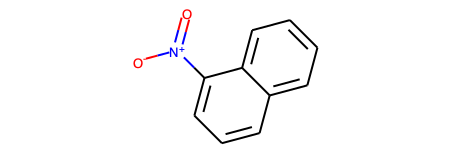

In [9]:
print(df['Compound ID'][100])
print(df.SMILES[100])
m = Chem.MolFromSmiles(df.SMILES[100])
m

## Molecule Class

## Comparing molecules to others


Notes:
    - we should use the comparision for the history as well as to the goal.
    - There must be a limit of history restores before it reverts twice
    - bad actions must somehow be penalized
    - use while loops to test
    - explore adding bonds 
    - explore processing the goal
Reward notes:
    - could get a reward through the % similarity and delta of the similarity 
    - minus one to penalise same state 
    - use history to have two deltas with a penalty term for being stagnent 
        - eg. 63% once from a previous 40% would be a reward = 63 + 23 - 1 = 85
        - 63% twice returns reward = 63 + 0 - 1 = 62
        
    

In [10]:
# Set mol
moltest = Mol('F', 'CN(C)C(=O)Nc1cccc(OC(=O)NC(C)(C)C)c1' )

In [11]:
# get Random Goal and initial molecule
moltest.GetRandomGoal()

1124    Trichloronate
Name: Compound ID, dtype: object

In [12]:
print("New goal:         " + moltest.goal + "\n" + "New initial Mol:  " + moltest.mol)

New goal:         CCOP(=S)(CC)Oc1cc(Cl)c(Cl)cc1Cl
New initial Mol:  O


In [13]:
# display current atom options 
atoms = moltest.get_Atoms()
print(atoms)
bonds = moltest.get_Bonds()
print(bonds)

['O', 'Cl', 'P', 'C', 'S']
[1.0, 2.0, 1.5]


In [29]:
# Add correct atom to mol
#moltest.AddA('C')
moltest.AddA(random.choice(atoms))


# Print history
moltest.DisplayChanges()

# print delta from goal
print("Molecule is {} % similar to the desired state".format( moltest.GetSimilarity()))

# show mol
moltest.GetMol()



Molecule at state S-1: 
OCPSSCOPCPC
Molecule at state S: 
OCPSSCOPCPCCl


RDKit ERROR: [14:53:04] Explicit valence for atom # 11 Cl, 2, is greater than permitted


ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.RDKFingerprint(NoneType)
did not match C++ signature:
    RDKFingerprint(RDKit::ROMol mol, unsigned int minPath=1, unsigned int maxPath=7, unsigned int fpSize=2048, unsigned int nBitsPerHash=2, bool useHs=True, double tgtDensity=0.0, unsigned int minSize=128, bool branchedPaths=True, bool useBondOrder=True, boost::python::api::object atomInvariants=0, boost::python::api::object fromAtoms=0, boost::python::api::object atomBits=None, boost::python::api::object bitInfo=None)

['OCPSSCOPCPCCl', 'OCPSSCOPCPC']
5.7336%


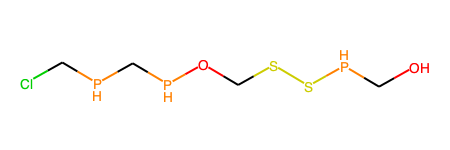

In [31]:
moltest.revertMol()
print(moltest.history())
print(str(moltest.GetSimilarity()) + "%")
moltest.GetMol()

In [24]:
moltest.AddA('e')

In [30]:
moltest.CheckValidity()

RDKit ERROR: [14:53:12] Explicit valence for atom # 11 Cl, 2, is greater than permitted


False

###  ML TESTING
    - create array of len possible mols
    - take the option that creates the largest delta
    

In [51]:
elements = Chem.GetPeriodicTable()
def GetValency(element):
    return list(elements.GetValenceList(element))[0]

In [53]:
GetValency("N")

3